In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df_org = pd.read_csv('Datasets\lending_club_loan_two.csv')
df_info = pd.read_csv('Datasets\lending_club_info.csv')
df_org.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [5]:
df_org.iloc[:5].transpose().reset_index()

,index,0,1,2,3,4
0,loan_amnt,10000,8000,15600,7200,24375
1,term,36 months,36 months,36 months,36 months,60 months
2,int_rate,11.44,11.99,10.49,6.49,17.27
3,installment,329.48,265.68,506.97,220.65,609.33
4,grade,B,B,B,A,C
5,sub_grade,B4,B5,B3,A2,C5
6,emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
7,emp_length,10+ years,4 years,< 1 year,6 years,9 years
8,home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
9,annual_inc,117000,65000,43057,54000,55000


In [6]:
df_org['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

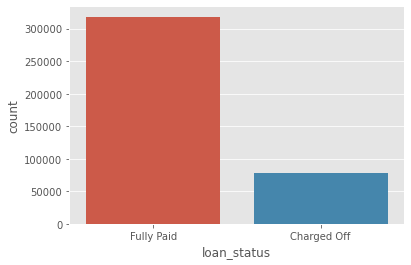

In [7]:
sns.countplot('loan_status', data=df_org)

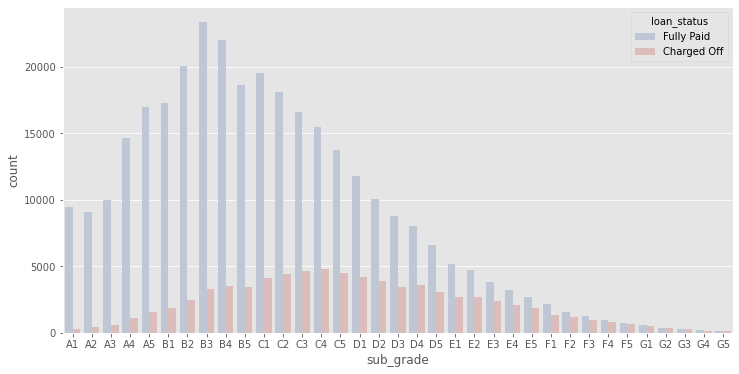

In [8]:
plt.figure(figsize=(12,6))
sns.countplot('sub_grade', data=df_org, order=sorted(df_org['sub_grade'].unique()), palette='vlag',
              hue='loan_status')

In [9]:
df = df_org.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [11]:
df.describe(include='O')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [12]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [13]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
print('Percentage value of missing data: ')
(df.isna().sum()/len(df))*100

Percentage value of missing data: 


loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [15]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
loan_status_map = {'Charged Off': 0, 'Fully Paid': 1}
df['loan_status'] = df['loan_status'].map(loan_status_map)

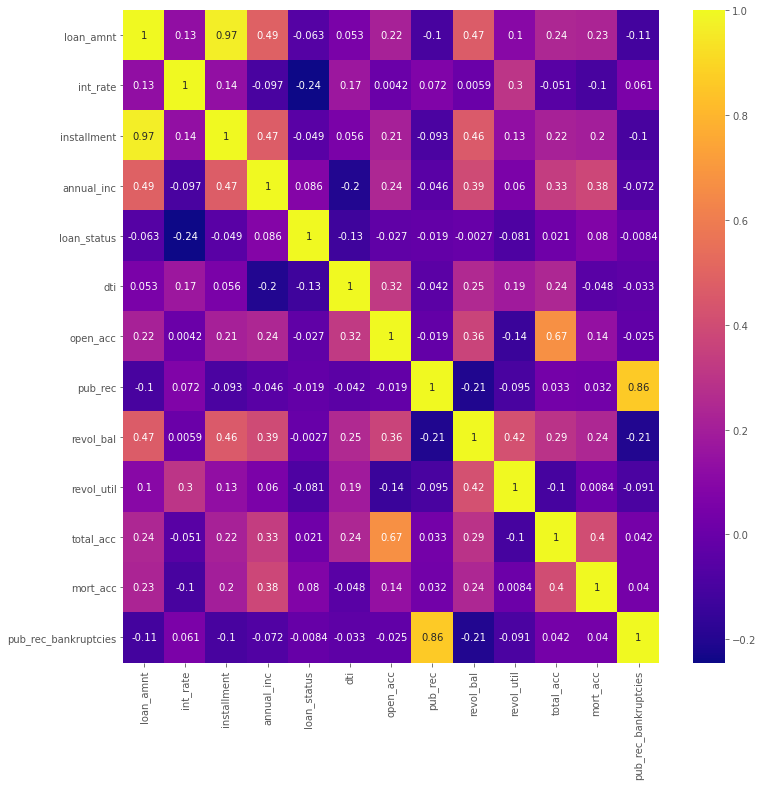

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'), cmap='plasma', annot=True)

*Try replace string to number in emp_length*

In [18]:
def below_one(length_work):
    if '<' in str(length_work):
        return '0'
    else:
        return length_work

In [19]:
df['work_length'] = df['emp_length'].apply(below_one)
df['work_length'] = df['work_length'].str.extract(r'(\d+)')
df['work_length'] = df['work_length'].apply(lambda x: x if pd.isna(x) else int(x))

In [20]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

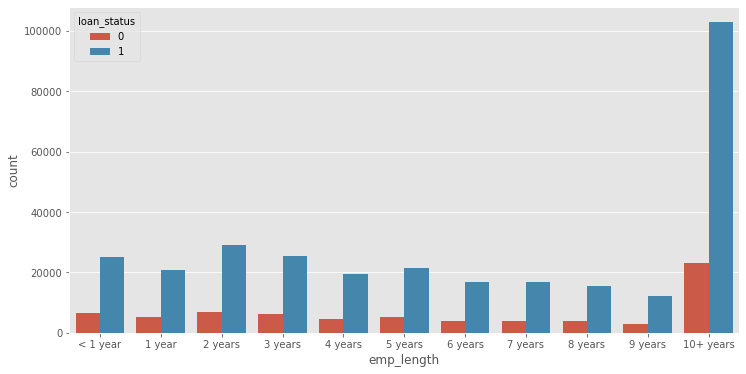

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=['< 1 year','1 year','2 years',
                                                        '3 years','4 years','5 years','6 years',
                                                        '7 years','8 years','9 years','10+ years'])

In [22]:
emp_length_charge_off = df[df['loan_status'] == 0].groupby('emp_length')['loan_status'].count()
emp_length_paid = df[df['loan_status'] == 1].groupby('emp_length')['loan_status'].count()
percentage_emp = emp_length_charge_off/emp_length_paid
percentage_emp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [23]:
df.drop(['emp_title', 'emp_length'], axis=1, inplace=True)

In [24]:
df.drop(['work_length'], axis=1, inplace=True)

In [25]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


*REPLACE HOME OWNERSHIP BY OTHER*

In [26]:
def home_ownership_replace(status):
    if status not in ['RENT', 'MORTGAGE', 'OWN']:
        return 'OTHER'
    else:
        return status

In [27]:
df['home_ownership'] = df['home_ownership'].apply(home_ownership_replace)

*Change term*

In [28]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})

*DIVIDE DATA BY GET_DUMMIES*

In [29]:
df = pd.get_dummies(df, columns=['sub_grade'], prefix='', prefix_sep='', drop_first=True)

In [30]:
df = pd.get_dummies(df, columns=['verification_status', 'home_ownership', 'initial_list_status',
                                'application_type', 'purpose'], drop_first=True)

*Fill NaN pub_rec_bankruptcies*

In [31]:
# adjustment value pub_rec to add pub_rec_bankruptcies
max_value_pub = df['pub_rec'].max()/df['pub_rec_bankruptcies'].max()

def replace_pub_rec_bankruptcies(value):
    if pd.isna(value[0]):
        return value[1]/max_value_pub
    else:
        return value[0]

In [32]:
df['pub_rec_bankruptcies'] = df[['pub_rec_bankruptcies', 'pub_rec']].apply(replace_pub_rec_bankruptcies, axis=1)

*Replace NaN revol_util by median*

In [33]:
revol_util_median = df['revol_util'].median()
df['revol_util'] = df['revol_util'].apply(lambda x: revol_util_median if pd.isna(x) else x)

In [34]:
df.drop('title', axis=1, inplace=True)

In [35]:
df.shape

(396030, 73)

In [36]:
df.isna().sum().iloc[:30]

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
annual_inc                  0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
A2                          0
A3                          0
A4                          0
A5                          0
B1                          0
B2                          0
B3                          0
B4                          0
B5                          0
C1                          0
C2                          0
C3                          0
dtype: int64

*Fill empty mort_acc*

In [37]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc               1.000000
total_acc              0.381072
annual_inc             0.236320
loan_amnt              0.222315
revol_bal              0.194925
                         ...   
purpose_moving        -0.031868
purpose_other         -0.033752
home_ownership_OWN    -0.065227
int_rate              -0.082583
home_ownership_RENT   -0.447957
Name: mort_acc, Length: 69, dtype: float64

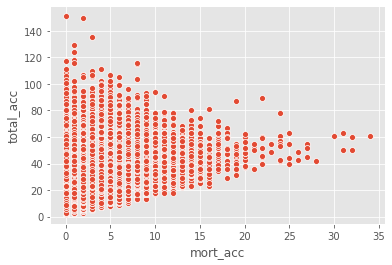

In [38]:
sns.scatterplot('mort_acc', 'total_acc', data=df)

In [39]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [40]:
df['total_acc'].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [41]:
grouped_total_acc = df.groupby('total_acc')['mort_acc'].mean()

In [42]:
def mortal_fill(col):
    if pd.isna(col[1]):
        return grouped_total_acc.loc[col[0]]
    else:
        return col[1]

In [43]:
df['mort_acc_fill'] = df[['total_acc', 'mort_acc']].apply(mortal_fill, axis=1)

In [44]:
df[pd.isna(df['mort_acc'])]

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,mort_acc_fill
22,4200.0,36,6.99,129.67,A,24000.0,Jun-2011,1,4.80,Oct-2006,...,0,0,0,0,1,0,0,0,0,0.221695
25,6000.0,36,11.36,197.47,B,46680.0,Apr-2010,0,6.56,Oct-2003,...,0,0,1,0,0,0,0,0,0,0.429158
32,3000.0,36,6.03,91.31,A,64000.0,Oct-2011,1,3.81,Apr-2002,...,0,0,0,0,0,0,0,0,0,1.235885
41,28000.0,60,19.91,312.04,E,52000.0,Dec-2011,0,20.70,Dec-1988,...,0,0,0,0,0,0,0,0,0,1.007405
62,5000.0,36,10.39,118.45,B,66000.0,May-2008,1,1.56,Dec-2001,...,0,0,1,0,0,0,0,0,0,1.151269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,36,9.63,179.73,B,54000.0,Mar-2011,1,6.84,Apr-1997,...,0,0,0,0,0,0,0,0,0,1.519932
395995,10000.0,36,10.25,323.85,B,55000.0,Apr-2010,1,18.59,Oct-1998,...,0,0,0,0,0,0,0,0,0,1.409380
396016,3000.0,36,5.42,90.48,A,70000.0,Aug-2011,1,13.94,Jun-1995,...,0,1,0,0,0,0,0,0,0,1.721794
396021,3200.0,36,5.42,96.52,A,33000.0,Feb-2011,1,21.45,Nov-1996,...,0,0,0,0,0,0,0,0,0,3.220866


In [45]:
df.drop(['mort_acc', 'grade'], inplace=True, axis=1)

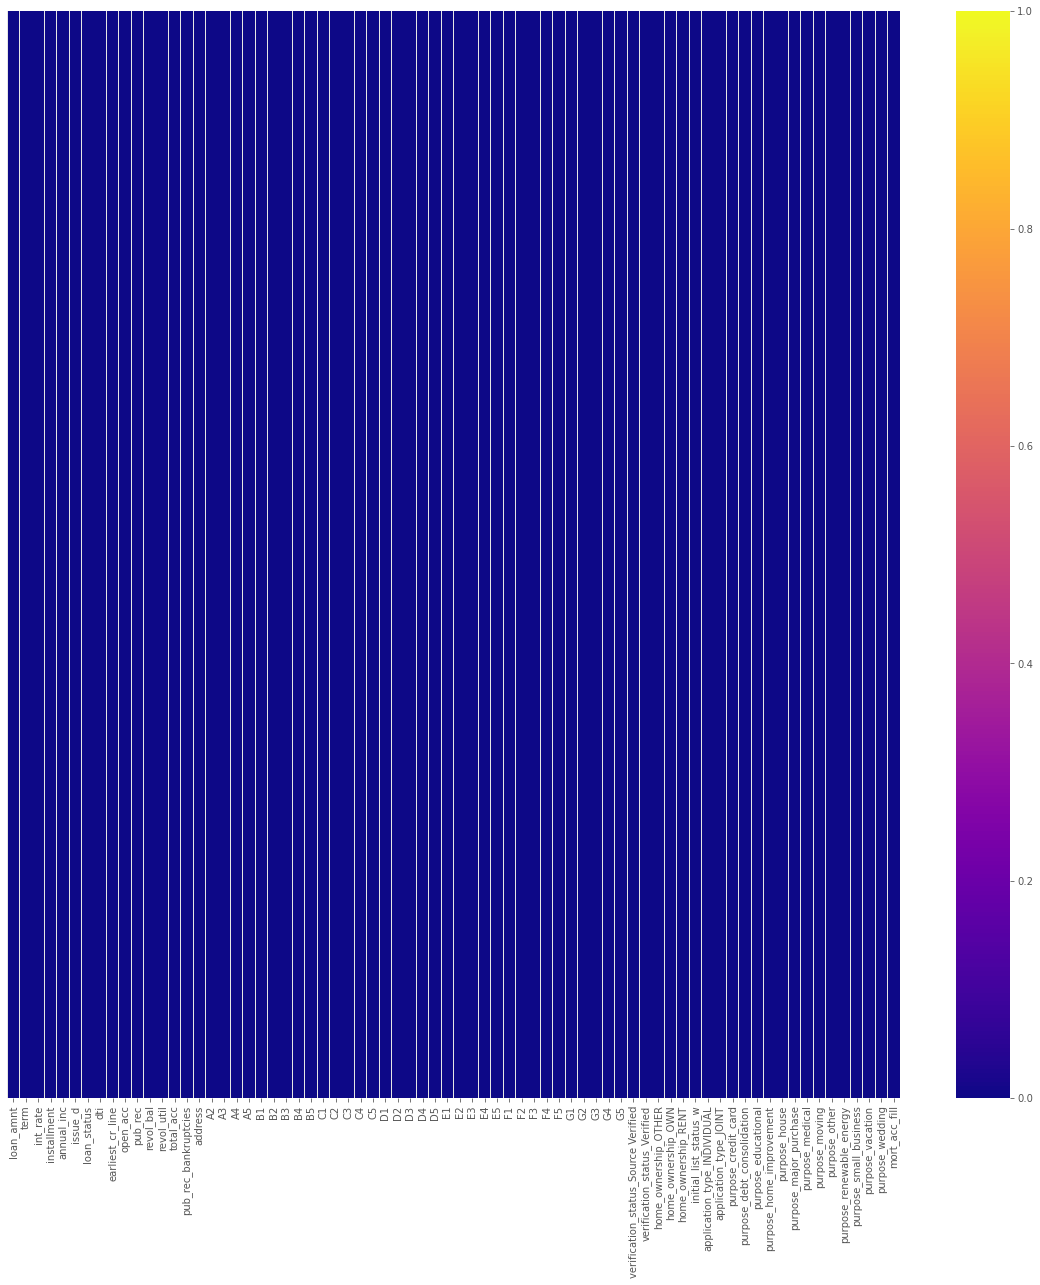

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), yticklabels=False, cmap='plasma', vmin=0, vmax=1)

In [47]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [48]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [49]:
df.drop('issue_d', axis=1, inplace=True)

*Split earliest_cr_line to month and year and try their corr*

In [50]:
from datetime import datetime

In [51]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(
    lambda x: datetime.strptime(x, '%b-%Y').year)

In [52]:
df.corr()['earliest_cr_line_year'].sort_values(ascending=False)

earliest_cr_line_year                  1.000000
home_ownership_RENT                    0.196655
int_rate                               0.108470
verification_status_Source Verified    0.036644
initial_list_status_w                  0.026916
                                         ...   
annual_inc                            -0.140456
loan_amnt                             -0.147003
revol_bal                             -0.199152
total_acc                             -0.278128
mort_acc_fill                         -0.288194
Name: earliest_cr_line_year, Length: 70, dtype: float64

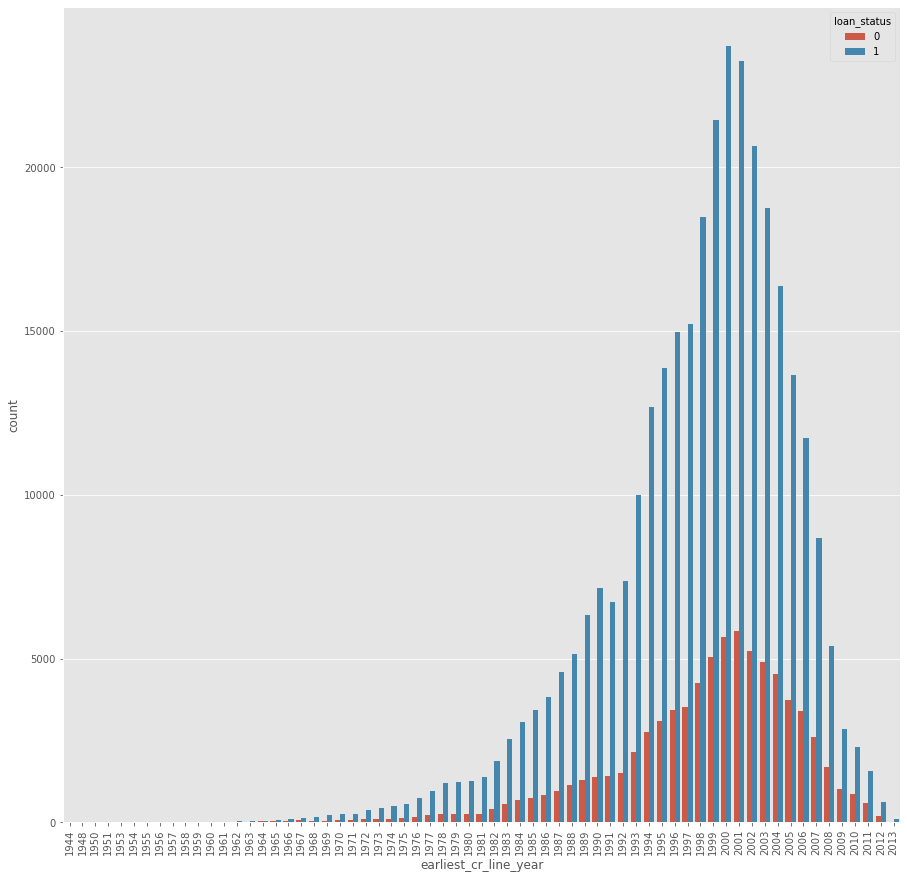

In [53]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(df['earliest_cr_line_year'], hue=df['loan_status'])

In [54]:
# try after prediction
# df.drop(['earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)
df.drop('earliest_cr_line', axis=1, inplace=True)

In [55]:
df.select_dtypes(['object']).columns

Index(['address'], dtype='object')

In [56]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [57]:
df['address'] = df['address'].apply(lambda x: int(x[-5:]))

In [58]:
df.corr()['address'].sort_values()

loan_status     -0.346862
mort_acc_fill   -0.022387
A4              -0.021782
A5              -0.020864
A3              -0.020677
                   ...   
E5               0.022607
revol_util       0.027282
term             0.063066
int_rate         0.086632
address          1.000000
Name: address, Length: 71, dtype: float64

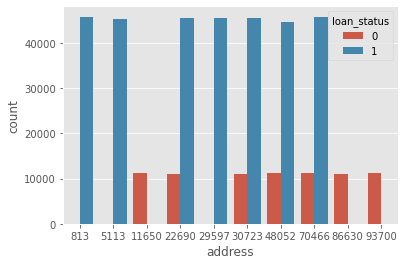

In [59]:
sns.countplot('address', data=df, hue='loan_status')

In [60]:
df = pd.get_dummies(df, columns=['address'], prefix='', prefix_sep='', drop_first=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   loan_status                          396030 non-null  int64  
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           396030 non-null  float64
 11  total_acc    

***
*MODEL*
***

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [63]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min')

In [68]:
X_train.shape

(316824, 78)

In [69]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam", loss="binary_crossentropy")

In [70]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/25
619/619 [==============================] - 2s 4ms/step - loss: 0.3244 - val_loss: 0.2665
Epoch 2/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2697 - val_loss: 0.2618
Epoch 3/25
619/619 [==============================] - 2s 4ms/step - loss: 0.2659 - val_loss: 0.2598
Epoch 4/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2640 - val_loss: 0.2596
Epoch 5/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2631 - val_loss: 0.2600
Epoch 6/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2623 - val_loss: 0.2587
Epoch 7/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2618 - val_loss: 0.2586
Epoch 8/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2615 - val_loss: 0.2589
Epoch 9/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2613 - val_loss: 0.2586
Epoch 10/25
619/619 [==============================] - 2s 3ms/step - loss: 0.2609 - val_loss: 0.2584

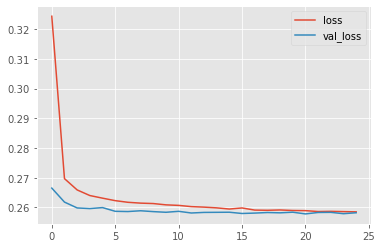

In [71]:
model_loss = pd.DataFrame(model.history.history)
model_loss[['loss','val_loss']].plot()

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [75]:
confusion_matrix(y_test,predictions)

array([[ 6764,  8729],
       [   42, 63671]], dtype=int64)